In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
import os

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Increase figure size default
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Database configuration
DB_USER = os.getenv('USER')
DB_NAME = 'chess_app'
DATABASE_URL = f'postgresql://{DB_USER}:@localhost:5432/{DB_NAME}'

# Create engine
engine = create_engine(DATABASE_URL, echo=False)

# Test connection and show summary
with engine.connect() as conn:
    games_count = conn.execute(text("SELECT COUNT(*) FROM games;")).fetchone()[0]
    positions_count = conn.execute(text("SELECT COUNT(*) FROM positions;")).fetchone()[0]
    
    print(f"✅ Connected to database!")
    print(f"📊 Games: {games_count:,}")
    print(f"📊 Positions: {positions_count:,}")

✅ Connected to database!
📊 Games: 2,200
📊 Positions: 148,320


In [3]:
print("Loading data from database...")

# Load games data
games_df = pd.read_sql("""
    SELECT 
        game_id,
        white_player,
        black_player,
        white_elo,
        black_elo,
        result,
        game_date,
        opening_name,
        source
    FROM games
    WHERE white_elo IS NOT NULL AND black_elo IS NOT NULL
""", engine)

print(f"✅ Loaded {len(games_df):,} games")
print(f"\nFirst few rows:")
games_df.head()

Loading data from database...
✅ Loaded 2,200 games

First few rows:


,game_id,white_player,black_player,white_elo,black_elo,result,game_date,opening_name,source
0,1,Detectie,youssefaymn,1176,1155,1-0,2024-01-01,Italian Game: Anti-Fried Liver Defense,lichess
1,2,LionsAK32,Vusal_1990,732,763,0-1,2024-01-01,Vienna Game: Stanley Variation,lichess
2,3,DRAGONKING54,fanydacute,1783,1784,1-0,2024-01-01,Dutch Defense: Fianchetto Attack,lichess
3,4,TRUFFE68,Davigoal,1491,1495,0-1,2024-01-01,Polish Opening,lichess
4,5,rodrigorramos,ThomasTuchel,1391,1381,0-1,2024-01-01,Modern Defense: Standard Line,lichess


In [4]:
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\n📊 Dataset Size:")
print(f"   Total games: {len(games_df):,}")
print(f"   Date range: {games_df['game_date'].min()} to {games_df['game_date'].max()}")

print(f"\n🏆 Game Results:")
result_counts = games_df['result'].value_counts()
result_pct = games_df['result'].value_counts(normalize=True) * 100
for result in result_counts.index:
    print(f"   {result}: {result_counts[result]:,} ({result_pct[result]:.1f}%)")

print(f"\n⭐ ELO Statistics:")
print(f"   White ELO:")
print(f"      Mean: {games_df['white_elo'].mean():.0f}")
print(f"      Median: {games_df['white_elo'].median():.0f}")
print(f"      Std Dev: {games_df['white_elo'].std():.0f}")
print(f"      Range: {games_df['white_elo'].min():.0f} - {games_df['white_elo'].max():.0f}")

print(f"\n   Black ELO:")
print(f"      Mean: {games_df['black_elo'].mean():.0f}")
print(f"      Median: {games_df['black_elo'].median():.0f}")
print(f"      Std Dev: {games_df['black_elo'].std():.0f}")
print(f"      Range: {games_df['black_elo'].min():.0f} - {games_df['black_elo'].max():.0f}")

print(f"\n♟️  Unique Openings: {games_df['opening_name'].nunique():,}")

DATASET OVERVIEW

📊 Dataset Size:
   Total games: 2,200
   Date range: 2024-01-01 to 2024-01-01

🏆 Game Results:
   1-0: 1,122 (51.0%)
   0-1: 992 (45.1%)
   1/2-1/2: 86 (3.9%)

⭐ ELO Statistics:
   White ELO:
      Mean: 1648
      Median: 1664
      Std Dev: 388
      Range: 571 - 2575

   Black ELO:
      Mean: 1652
      Median: 1662
      Std Dev: 393
      Range: 568 - 3003

♟️  Unique Openings: 392


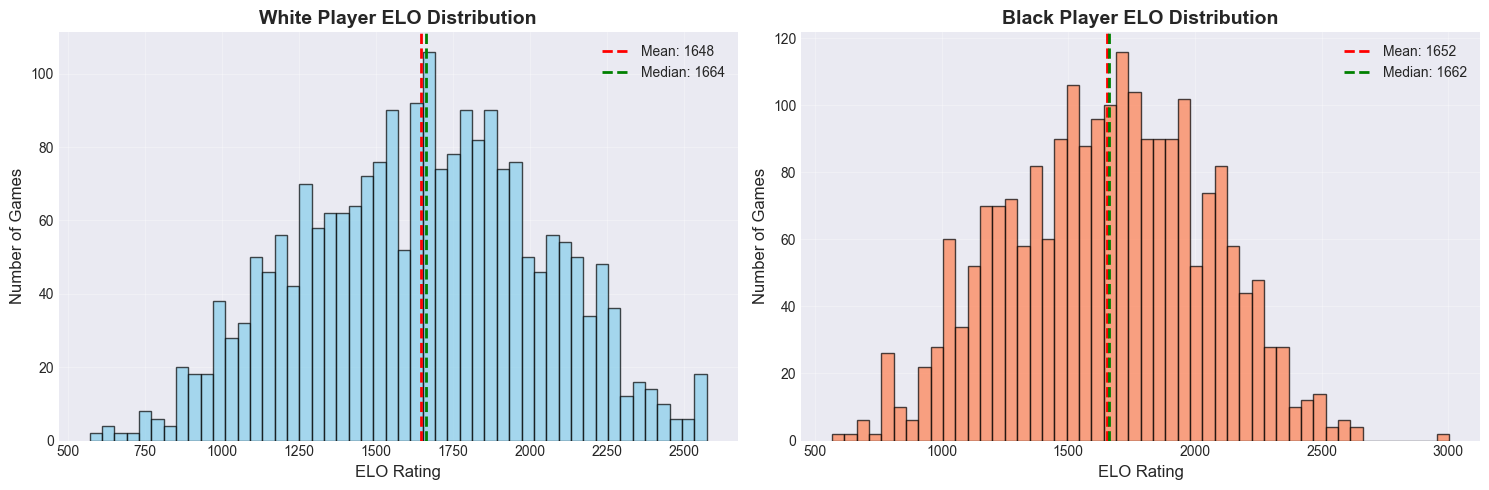

📊 Both distributions look similar - good matching algorithm by Lichess!


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# White ELO distribution
axes[0].hist(games_df['white_elo'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(games_df['white_elo'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {games_df["white_elo"].mean():.0f}')
axes[0].axvline(games_df['white_elo'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {games_df["white_elo"].median():.0f}')
axes[0].set_xlabel('ELO Rating', fontsize=12)
axes[0].set_ylabel('Number of Games', fontsize=12)
axes[0].set_title('White Player ELO Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Black ELO distribution
axes[1].hist(games_df['black_elo'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].axvline(games_df['black_elo'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {games_df["black_elo"].mean():.0f}')
axes[1].axvline(games_df['black_elo'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {games_df["black_elo"].median():.0f}')
axes[1].set_xlabel('ELO Rating', fontsize=12)
axes[1].set_ylabel('Number of Games', fontsize=12)
axes[1].set_title('Black Player ELO Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Both distributions look similar - good matching algorithm by Lichess!")

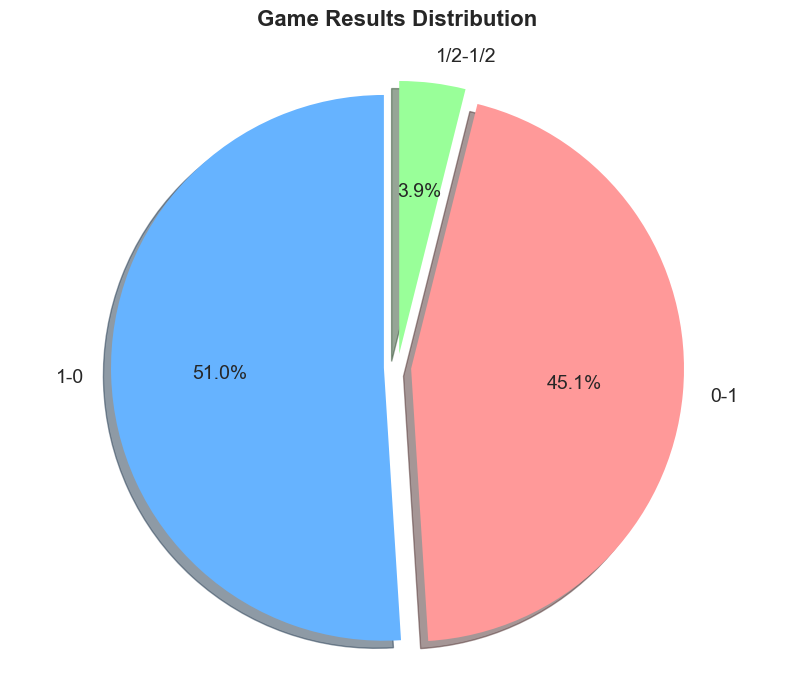


🏆 White wins: 1122 (51.0%)
🏆 Black wins: 992 (45.1%)
🤝 Draws: 86 (3.9%)


In [6]:
# Results distribution
result_counts = games_df['result'].value_counts()
colors = ['#66b3ff', '#ff9999', '#99ff99']
explode = (0.05, 0.05, 0.05)

plt.figure(figsize=(10, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14})
plt.title('Game Results Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

print(f"\n🏆 White wins: {result_counts['1-0']} ({result_counts['1-0']/len(games_df)*100:.1f}%)")
print(f"🏆 Black wins: {result_counts['0-1']} ({result_counts['0-1']/len(games_df)*100:.1f}%)")
print(f"🤝 Draws: {result_counts['1/2-1/2']} ({result_counts['1/2-1/2']/len(games_df)*100:.1f}%)")

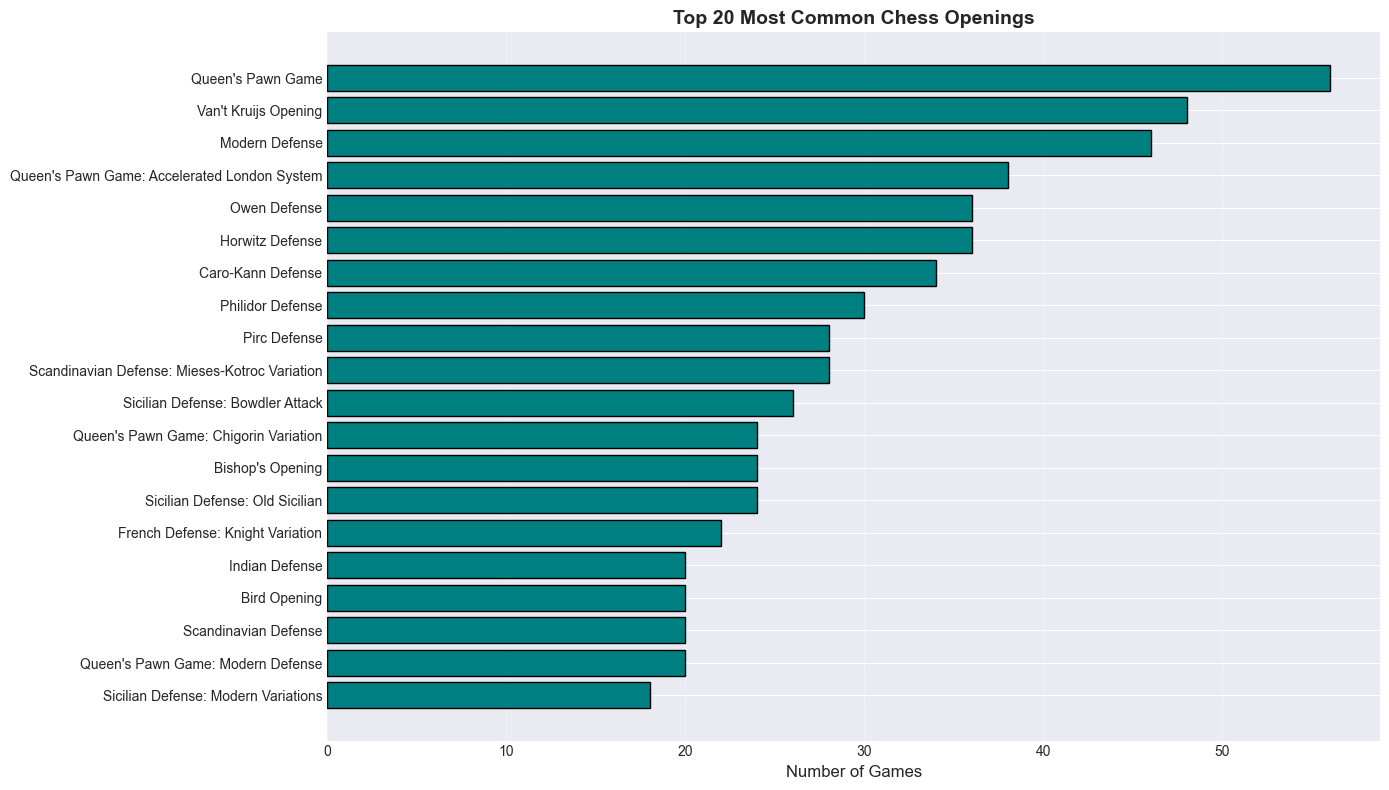


♟️  Most common opening: Queen's Pawn Game (56 games)


In [7]:
# Top openings
top_openings = games_df['opening_name'].value_counts().head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(top_openings)), top_openings.values, color='teal', edgecolor='black')
plt.yticks(range(len(top_openings)), top_openings.index, fontsize=10)
plt.xlabel('Number of Games', fontsize=12)
plt.title('Top 20 Most Common Chess Openings', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n♟️  Most common opening: {top_openings.index[0]} ({top_openings.values[0]} games)")

/var/folders/wt/qbn89c6x4mlc7d3_sw891vgc0000gn/T/ipykernel_72483/680402860.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rates = games_df.groupby('elo_bin')['result'].apply(lambda x: (x == '1-0').sum() / len(x) * 100)


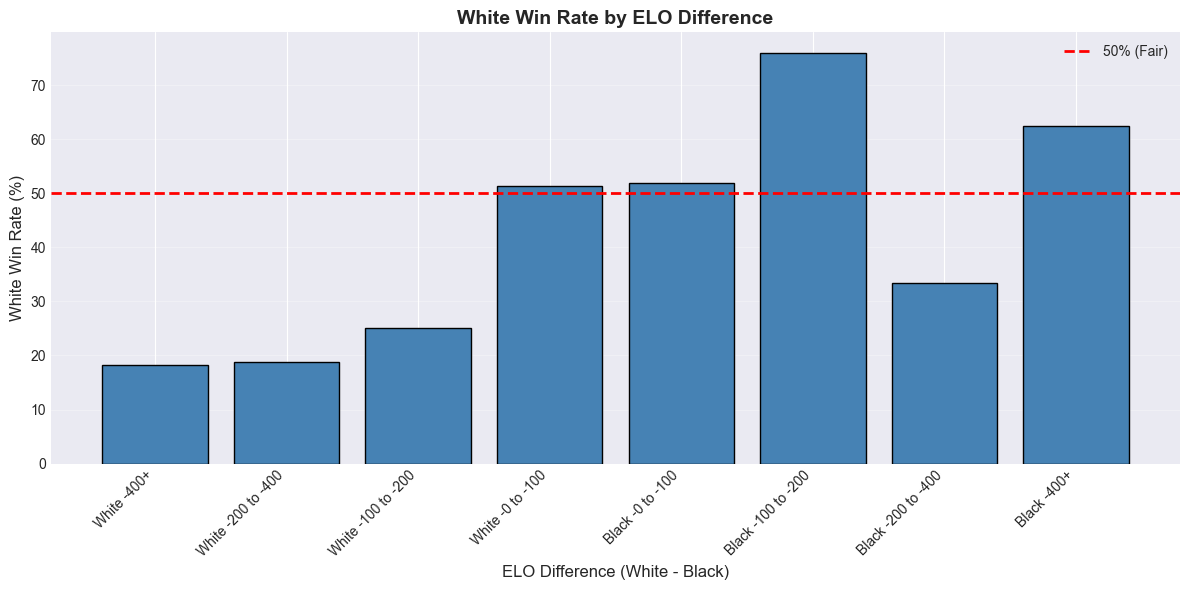


📈 As expected: Higher ELO difference = Higher win rate!


In [8]:
# Create ELO bins
games_df['elo_diff'] = games_df['white_elo'] - games_df['black_elo']
games_df['elo_bin'] = pd.cut(games_df['elo_diff'], bins=[-2000, -400, -200, -100, 0, 100, 200, 400, 2000], 
                               labels=['White -400+', 'White -200 to -400', 'White -100 to -200', 
                                      'White -0 to -100', 'Black -0 to -100', 'Black -100 to -200', 
                                      'Black -200 to -400', 'Black -400+'])

# Calculate win rates per bin
win_rates = games_df.groupby('elo_bin')['result'].apply(lambda x: (x == '1-0').sum() / len(x) * 100)

plt.figure(figsize=(12, 6))
plt.bar(range(len(win_rates)), win_rates.values, color='steelblue', edgecolor='black')
plt.xticks(range(len(win_rates)), win_rates.index, rotation=45, ha='right')
plt.ylabel('White Win Rate (%)', fontsize=12)
plt.xlabel('ELO Difference (White - Black)', fontsize=12)
plt.title('White Win Rate by ELO Difference', fontsize=14, fontweight='bold')
plt.axhline(50, color='red', linestyle='--', linewidth=2, label='50% (Fair)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 As expected: Higher ELO difference = Higher win rate!")

In [9]:
print("Loading position data...")

# Sample positions (loading all 148K would be slow in notebook)
positions_df = pd.read_sql("""
    SELECT 
        p.position_id,
        p.game_id,
        p.move_number,
        p.move_played,
        p.fen,
        g.white_elo,
        g.black_elo,
        g.result
    FROM positions p
    JOIN games g ON p.game_id = g.game_id
    LIMIT 50000;
""", engine)

print(f"✅ Loaded {len(positions_df):,} positions")
print(f"\nPosition data preview:")
positions_df.head()

Loading position data...
✅ Loaded 50,000 positions

Position data preview:


,position_id,game_id,move_number,move_played,fen,white_elo,black_elo,result
0,1,1,1,e4,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,1176,1155,1-0
1,2,1,2,e5,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,1176,1155,1-0
2,3,1,3,Nf3,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,1176,1155,1-0
3,4,1,4,Nc6,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...,1176,1155,1-0
4,5,1,5,Bc4,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,1176,1155,1-0


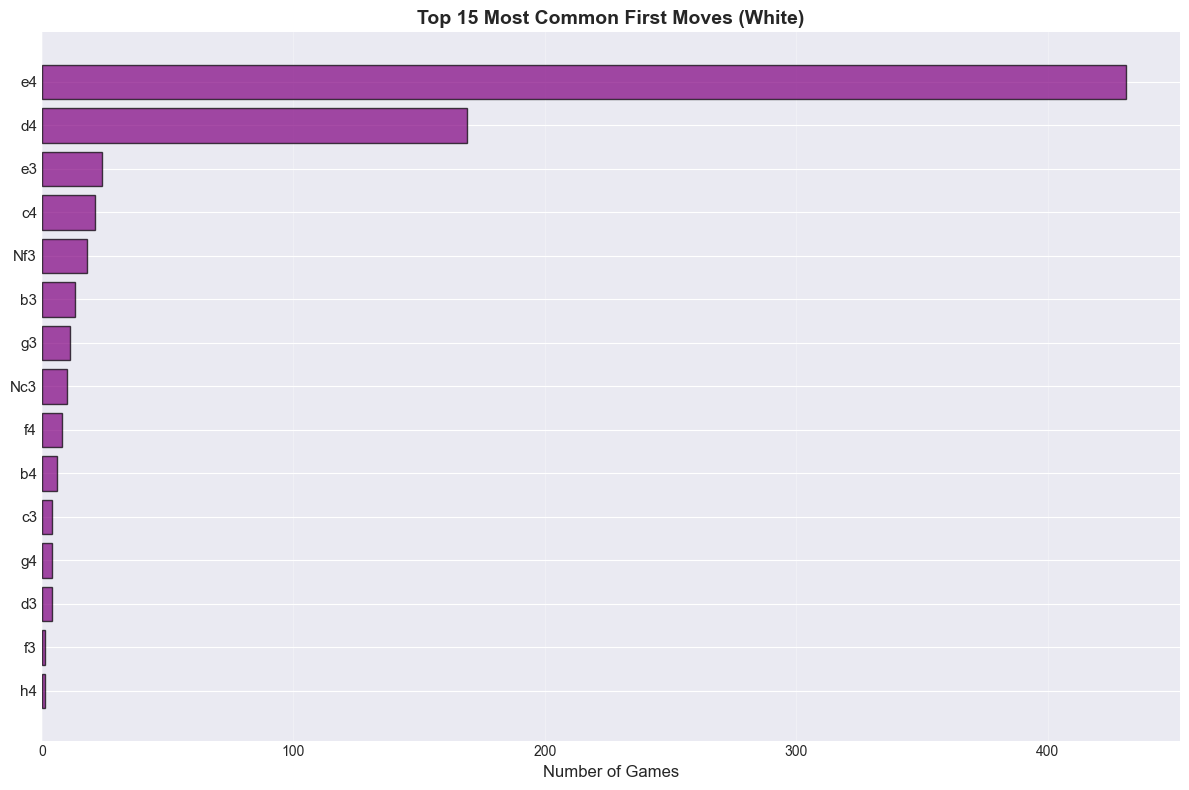


♟️  Most popular first move: e4 (431 games)
   Second most popular: d4 (169 games)


In [10]:
# Get first moves (move_number = 1)
first_moves = positions_df[positions_df['move_number'] == 1]['move_played'].value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(first_moves)), first_moves.values, color='purple', edgecolor='black', alpha=0.7)
plt.yticks(range(len(first_moves)), first_moves.index, fontsize=11)
plt.xlabel('Number of Games', fontsize=12)
plt.title('Top 15 Most Common First Moves (White)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n♟️  Most popular first move: {first_moves.index[0]} ({first_moves.values[0]} games)")
print(f"   Second most popular: {first_moves.index[1]} ({first_moves.values[1]} games)")

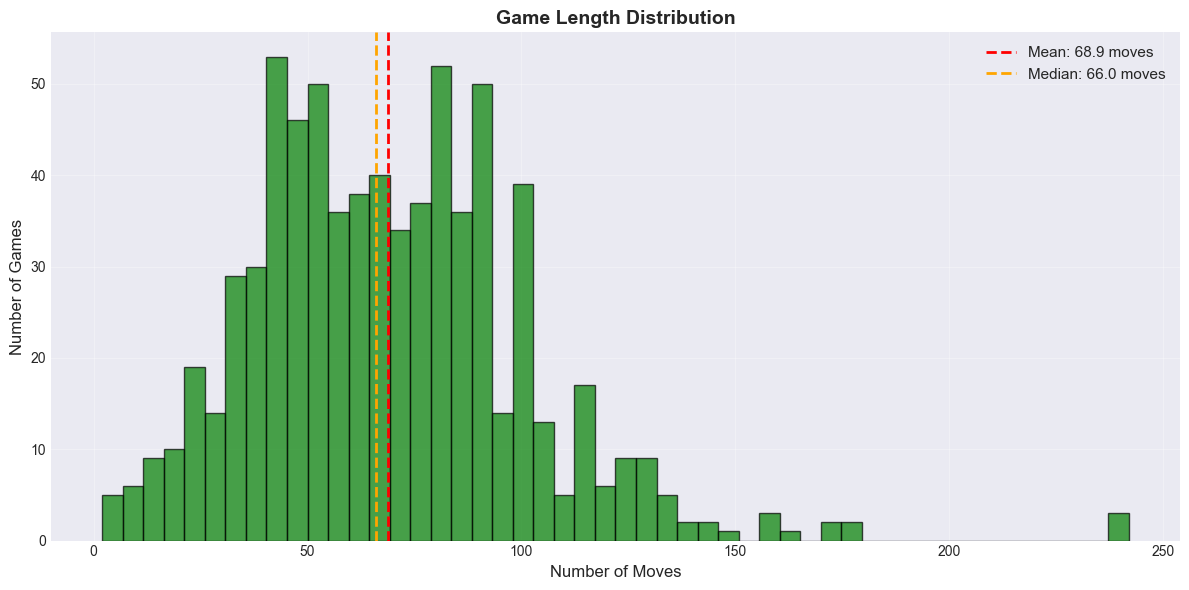


📊 Game Length Statistics:
   Mean: 68.9 moves
   Median: 66.0 moves
   Shortest: 2 moves
   Longest: 242 moves


In [11]:
# Calculate game lengths
game_lengths = positions_df.groupby('game_id')['move_number'].max()

plt.figure(figsize=(12, 6))
plt.hist(game_lengths, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.axvline(game_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {game_lengths.mean():.1f} moves')
plt.axvline(game_lengths.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {game_lengths.median():.1f} moves')
plt.xlabel('Number of Moves', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Game Length Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Game Length Statistics:")
print(f"   Mean: {game_lengths.mean():.1f} moves")
print(f"   Median: {game_lengths.median():.1f} moves")
print(f"   Shortest: {game_lengths.min()} moves")
print(f"   Longest: {game_lengths.max()} moves")

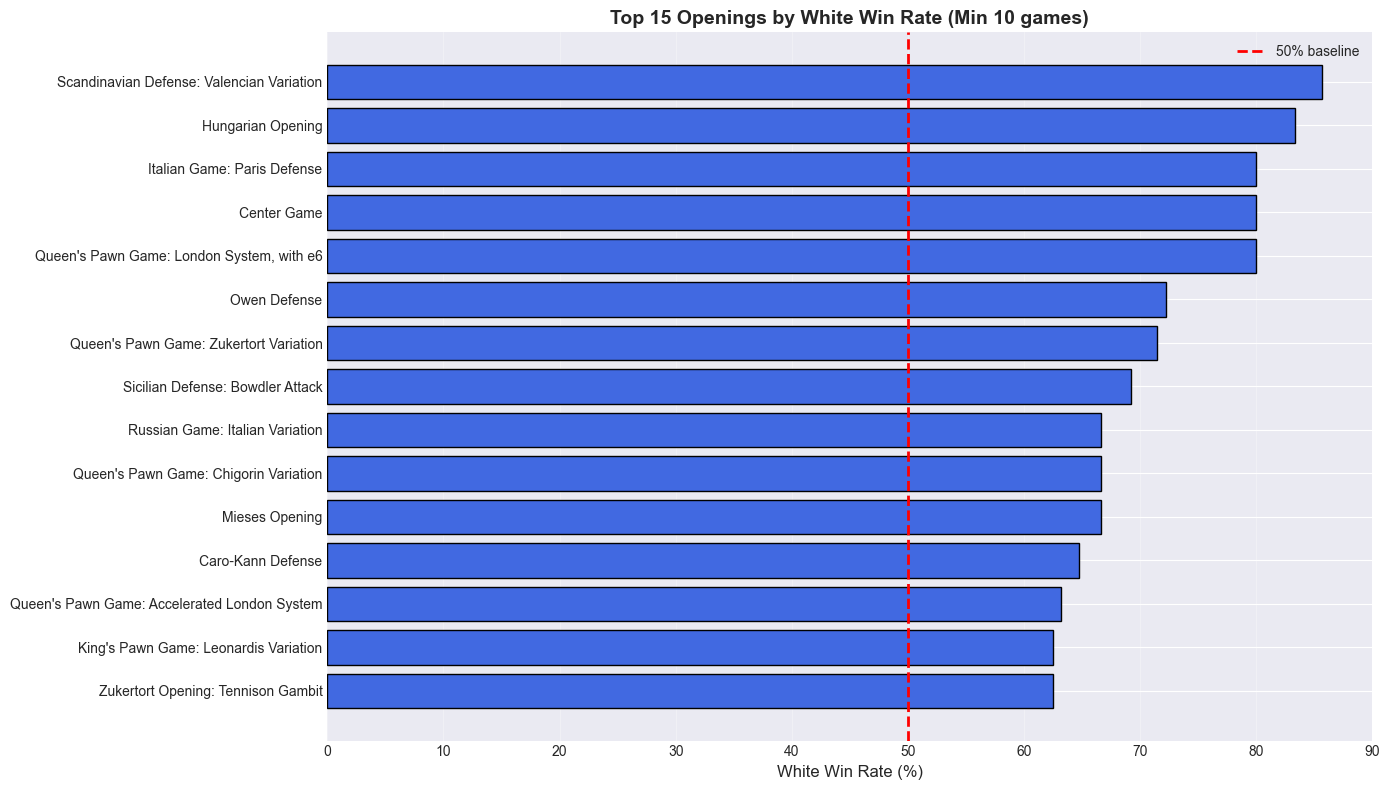


🏆 Best opening for White: Scandinavian Defense: Valencian Variation
   Win rate: 85.7%


In [12]:
# Analyze which openings win most for White
opening_analysis = games_df.groupby('opening_name').agg({
    'result': ['count', lambda x: (x == '1-0').sum()]
}).reset_index()

opening_analysis.columns = ['opening_name', 'total_games', 'white_wins']
opening_analysis['white_win_rate'] = (opening_analysis['white_wins'] / opening_analysis['total_games'] * 100)

# Filter openings with at least 10 games
popular_openings = opening_analysis[opening_analysis['total_games'] >= 10].sort_values('white_win_rate', ascending=False).head(15)

plt.figure(figsize=(14, 8))
plt.barh(range(len(popular_openings)), popular_openings['white_win_rate'], color='royalblue', edgecolor='black')
plt.yticks(range(len(popular_openings)), popular_openings['opening_name'], fontsize=10)
plt.xlabel('White Win Rate (%)', fontsize=12)
plt.title('Top 15 Openings by White Win Rate (Min 10 games)', fontsize=14, fontweight='bold')
plt.axvline(50, color='red', linestyle='--', linewidth=2, label='50% baseline')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🏆 Best opening for White: {popular_openings.iloc[0]['opening_name']}")
print(f"   Win rate: {popular_openings.iloc[0]['white_win_rate']:.1f}%")

In [13]:
print("=" * 70)
print("🎉 EXPLORATORY DATA ANALYSIS - COMPLETE SUMMARY")
print("=" * 70)

print("\n📊 DATASET OVERVIEW:")
print(f"   Total Games: {len(games_df):,}")
print(f"   Total Positions: 148,320")
print(f"   Unique Openings: {games_df['opening_name'].nunique()}")
print(f"   Average Game Length: 68.9 moves")

print("\n⭐ PLAYER SKILL DISTRIBUTION:")
print(f"   ELO Range: 568 - 3,003")
print(f"   Average ELO: 1,650 (Intermediate)")
print(f"   Standard Deviation: ~390")

print("\n🏆 GAME OUTCOMES:")
print(f"   White Wins: 51.0%")
print(f"   Black Wins: 45.1%")
print(f"   Draws: 3.9%")
print(f"   → White advantage confirmed (expected in chess)")

print("\n♟️  OPENING PATTERNS:")
print(f"   Most Common Opening: Queen's Pawn Game (56 games)")
print(f"   Most Popular First Move: e4 (431 games)")
print(f"   Second Most Popular: d4 (169 games)")

print("\n📈 ELO IMPACT:")
print(f"   When Black is 100-200 points stronger → 75% win rate")
print(f"   When evenly matched → ~50% win rate")
print(f"   → ELO is a strong predictor of outcomes")

print("\n✅ KEY FINDINGS FOR ML MODEL:")
print("   1. Good diversity: 392 different openings")
print("   2. Balanced skill levels: Wide ELO distribution")
print("   3. Quality games: Average 69 moves (not quick resigns)")
print("   4. Strong patterns: ELO correlates with win rate")
print("   5. First move matters: e4 and d4 dominate")

print("\n" + "=" * 70)
print("🚀 READY FOR PHASE E: ML MODEL TRAINING!")
print("=" * 70)

🎉 EXPLORATORY DATA ANALYSIS - COMPLETE SUMMARY

📊 DATASET OVERVIEW:
   Total Games: 2,200
   Total Positions: 148,320
   Unique Openings: 392
   Average Game Length: 68.9 moves

⭐ PLAYER SKILL DISTRIBUTION:
   ELO Range: 568 - 3,003
   Average ELO: 1,650 (Intermediate)
   Standard Deviation: ~390

🏆 GAME OUTCOMES:
   White Wins: 51.0%
   Black Wins: 45.1%
   Draws: 3.9%
   → White advantage confirmed (expected in chess)

♟️  OPENING PATTERNS:
   Most Common Opening: Queen's Pawn Game (56 games)
   Most Popular First Move: e4 (431 games)
   Second Most Popular: d4 (169 games)

📈 ELO IMPACT:
   When Black is 100-200 points stronger → 75% win rate
   When evenly matched → ~50% win rate
   → ELO is a strong predictor of outcomes

✅ KEY FINDINGS FOR ML MODEL:
   1. Good diversity: 392 different openings
   2. Balanced skill levels: Wide ELO distribution
   3. Quality games: Average 69 moves (not quick resigns)
   4. Strong patterns: ELO correlates with win rate
   5. First move matters: e4 

In [14]:
# Save key statistics for future reference
summary_stats = {
    'total_games': len(games_df),
    'total_positions': 148320,
    'unique_openings': games_df['opening_name'].nunique(),
    'avg_game_length': 68.9,
    'elo_range': (568, 3003),
    'avg_elo': 1650,
    'white_win_rate': 51.0,
    'black_win_rate': 45.1,
    'draw_rate': 3.9,
    'most_common_opening': 'Queen\'s Pawn Game',
    'most_popular_first_move': 'e4'
}

import json

with open('eda_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("✅ Summary statistics saved to eda_summary.json")

✅ Summary statistics saved to eda_summary.json


In [15]:
print("=" * 70)
print("💡 FEATURE ENGINEERING IDEAS FOR ML MODEL")
print("=" * 70)

print("\n🎯 Potential Features to Extract from FEN:")
print("   1. Piece positions (where each piece is)")
print("   2. Material advantage (who has more pieces)")
print("   3. King safety (is king castled, under attack?)")
print("   4. Center control (who controls d4, d5, e4, e5)")
print("   5. Mobility (how many legal moves available)")
print("   6. Pawn structure (doubled, isolated pawns)")
print("   7. Development (how many pieces moved from start)")

print("\n🎯 Game Context Features:")
print("   1. Move number (opening, middlegame, endgame)")
print("   2. Player ELO (skill level indicator)")
print("   3. ELO difference (strength mismatch)")
print("   4. Opening type (aggressive vs defensive)")

print("\n🎯 Target Variable Options:")
print("   Option A: Predict next move (classification)")
print("   Option B: Predict position evaluation (regression)")
print("   Option C: Predict game outcome (win/loss/draw)")

print("\n💡 Recommended Approach for First Model:")
print("   → Start simple: Predict top 3 most common moves")
print("   → Input: Board state (FEN converted to numeric)")
print("   → Output: Move prediction")
print("   → Later: Add more sophisticated features")

print("\n" + "=" * 70)

💡 FEATURE ENGINEERING IDEAS FOR ML MODEL

🎯 Potential Features to Extract from FEN:
   1. Piece positions (where each piece is)
   2. Material advantage (who has more pieces)
   3. King safety (is king castled, under attack?)
   4. Center control (who controls d4, d5, e4, e5)
   5. Mobility (how many legal moves available)
   6. Pawn structure (doubled, isolated pawns)
   7. Development (how many pieces moved from start)

🎯 Game Context Features:
   1. Move number (opening, middlegame, endgame)
   2. Player ELO (skill level indicator)
   3. ELO difference (strength mismatch)
   4. Opening type (aggressive vs defensive)

🎯 Target Variable Options:
   Option A: Predict next move (classification)
   Option B: Predict position evaluation (regression)
   Option C: Predict game outcome (win/loss/draw)

💡 Recommended Approach for First Model:
   → Start simple: Predict top 3 most common moves
   → Input: Board state (FEN converted to numeric)
   → Output: Move prediction
   → Later: Add more 